In [146]:
# Create a new conda environment with the following command:
# conda create -n bench python=3 pandas seaborn matplotlib numpy
# conda activate bench

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [147]:
# problem_size,dims,kernel,tool,accel_size,accel_version,strategy,threads,board,REST OF PERF OUT,filename
# file_path='../results/results-tul-Fri_31_Mar_2023_03:26:42_PM_UTC.csv'
# file_path = '../results/results-tul-2023_04_03-01:27:15-UTC-baseline.csv'
file_path = '../results/results-tul-2023_04_03-00:22:42-UTC-best_mr_copy.csv'
# file_path = '../results/results-latest.csv'

# read file into rows
rows = []
with open(file_path, 'r') as f:
    for line in f:
        rows.append(line.split(','))


df = pd.DataFrame.from_records(rows)
df.head()

# only keep columns from A to L
df = df.iloc[:, 0:12]

# drop column 10
df = df.drop(columns=[10])
df.head()


df.columns = ['problem_size', 'dims', 'kernel', 'tool', 'accel_size',
              'accel_version', 'strategy', 'threads', 'board', 'value', 'metric']
df.head()

# make accel_size an int
df['accel_size'] = df['accel_size'].astype(int)

# problem_size has a string of three values that are always the same
# split problem size and assign it to dims column
df['dims'] = df['problem_size'].str.split('_').str[0]
df['dims'] = df['dims'].astype(int)

# make value a float, using toNumeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# drop problem_size column
df = df.drop(columns=['problem_size'])
# drop threads column
df = df.drop(columns=['threads'])

# show the unique values in the accel_size, accel_version, and strategy columns
print(df['accel_size'].unique())
print(df['accel_version'].unique())
print(df['strategy'].unique())
print(df['tool'].unique())
print(df['board'].unique())
print(df['metric'].unique())

df.head()


[ 4  8 16  0]
['v2' 'v1' 'v3' 'NONE']
['As' 'Ns' 'Bs' 'Cs' 'NONE']
['mlir_ACC' 'cpp_MAN' 'mlir_CPU']
['tul_rel']
['branch-instructions' 'branch-misses' 'cache-references' 'cache-misses'
 'cpu-cycles' 'context-switches' 'page-faults' 'task-clock'
 'L1-dcache-load-misses' 'L1-dcache-loads' 'L1-dcache-stores'
 'L1-icache-load-misses' 'duration_time']


,dims,kernel,tool,accel_size,accel_version,strategy,board,value,metric
0,128,matmul_i32,mlir_ACC,4,v2,As,tul_rel,13547556.0,branch-instructions
1,128,matmul_i32,mlir_ACC,4,v2,As,tul_rel,1841700.0,branch-misses
2,128,matmul_i32,mlir_ACC,4,v2,As,tul_rel,62331926.0,cache-references
3,128,matmul_i32,mlir_ACC,4,v2,As,tul_rel,389680.0,cache-misses
4,128,matmul_i32,mlir_ACC,4,v2,As,tul_rel,273710346.0,cpu-cycles


# Filter the data based on dictionary and plot

In [148]:
# list all the columns
# all_columns = ['problem_size', 'dims', 'kernel', 'tool', 'accel_size', 'accel_version',
#                'strategy', 'threads', 'board', 'value', 'metric']
all_columns = df.columns

# Edit as needed
# Filtering a df with multiple values can be done like this:
# df[(df['metric'] == 'task-clock') & (df['strategy'] == 'Ns')]
filter_dict = {'metric': 'task-clock',
               'strategy': 'Ns'}
# filter_dict = {'metric': 'task-clock'}


def filter_df(df, filter_dict):
    """Filter the df based on dictionary key pairs"""
    # now implement the filter [(df['metric'] == 'task-clock') & (df['strategy'] == 'Ns') & ...]
    filter = []
    for key, value in filter_dict.items():
        filter.append(df[key] == value)
    # filter is a list of boolean arrays
    # use the & operator to combine them
    filter = np.array(filter).all(axis=0)
    # apply the filter
    return df[filter]


f_test = filter_df(df, filter_dict)
print('Using {}, we get {} rows'.format(filter_dict, len(f_test)))
f_test.head()


Using {'metric': 'task-clock', 'strategy': 'Ns'}, we get 90 rows


,dims,kernel,tool,accel_size,accel_version,strategy,board,value,metric
20,128,matmul_i32,mlir_ACC,8,v1,Ns,tul_rel,90.00,task-clock
46,16,matmul_i32,mlir_ACC,16,v2,Ns,tul_rel,14.71,task-clock
85,64,matmul_i32,cpp_MAN,16,v1,Ns,tul_rel,19.78,task-clock
98,64,matmul_i32,cpp_MAN,8,v3,Ns,tul_rel,26.31,task-clock
137,128,matmul_i32,cpp_MAN,8,v3,Ns,tul_rel,109.77,task-clock


pv_index:	['dims', 'kernel', 'accel_size', 'accel_version', 'strategy', 'board', 'metric']
pv_columns:	['tool']
to_plot:	['value']
len of df_pivot: 51
dropping kernel          unique value is: Index(['matmul_i32'], dtype='object', name='kernel') 
dropping board           unique value is: Index(['tul_rel'], dtype='object', name='board') 
dropping metric          unique value is: Index(['task-clock'], dtype='object', name='metric') 


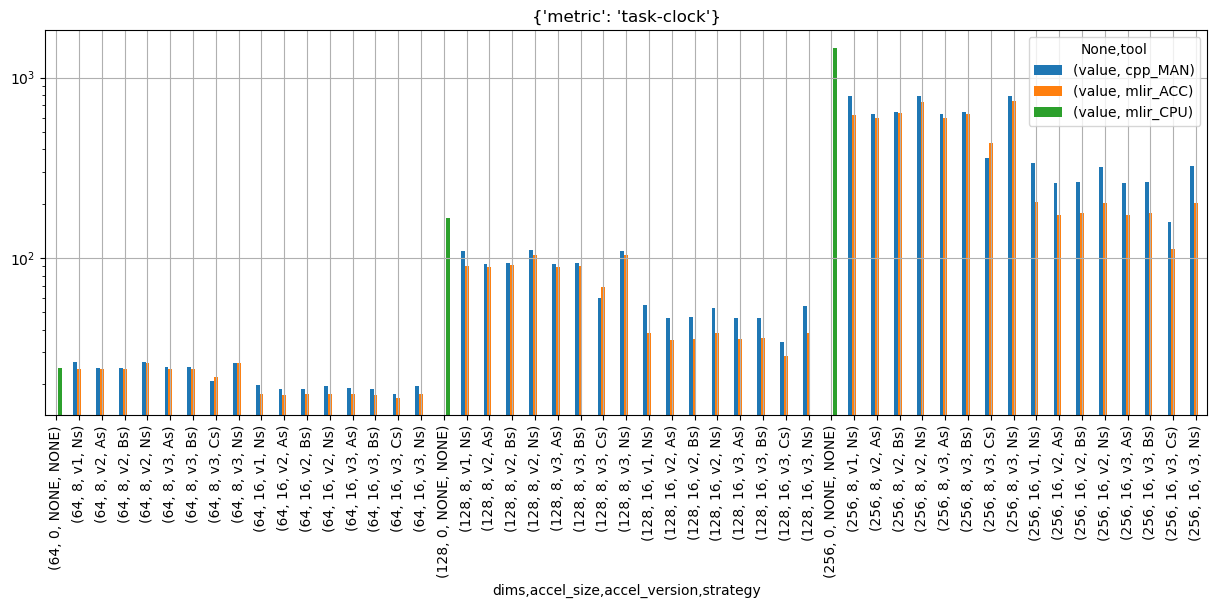

In [157]:
# filter_dict = {'metric': 'task-clock',
#                 'accel_version': 'v3',
#                 'dims': 128}
# filter_dict = {'metric': 'task-clock',
#                 'strategy': 'Ns',
#                 'dims': 128}
filter_dict = {}
filter_dict['metric'] = 'task-clock'
# filter_dict['metric'] = 'cache-references'
# filter_dict['metric'] = 'branch-instructions'
# filter_dict['metric'] = 'branch-misses'
# filter_dict['metric'] = 'page-faults'

# filter_dict['strategy'] = 'NA'
# filter_dict['strategy'] = 'Ns'
# filter_dict['accel_size'] = 16
# filter_dict['tool'] = 'cpp_MAN'

# filter_dict['accel_version'] = 'v3'
# filter_dict['dims'] = 16
# filter_dict['dims'] = 64
# filter_dict['dims'] = 128
# filter_dict['dims'] = 256

filtered_df = filter_df(df, filter_dict)

# remove tool that is mlir_ACC
# filtered_df = filtered_df[filtered_df.tool != 'mlir_ACC']

# filter out accel_type v1
# filtered_df = filtered_df[filtered_df.accel_version != 'v1']

# filter any accel_size simaller than 4
# filtered_df = filtered_df[filtered_df.accel_size >= 8]

# filter, accept accel_size different than 4
filtered_df = filtered_df[filtered_df.accel_size != 4]

# filter any dims simaller than 64
filtered_df = filtered_df[filtered_df.dims >= 64]

# filter out tool cpp_MAN that is not strategy Ns
# positive_filter = (filtered_df['tool'] == 'cpp_MAN') & (
#     filtered_df['strategy'] != 'Ns')
# filtered_df = filtered_df[~positive_filter]


# remove everything that is not strategy Ns and NA
# filtered_df = filtered_df[(filtered_df['strategy'] == 'Ns') | (
#     filtered_df['strategy'] == 'NONE')]

to_plot = ['value']
# pv_columns = ['strategy', 'tool']
pv_columns = ['tool']
# pv_columns = ['accel_version']
# make pv_index the remaining column names not in pv_columns and to_plot
pv_index = [x for x in all_columns if x not in pv_columns + to_plot]

print('pv_index:\t{}'.format(pv_index))
print('pv_columns:\t{}'.format(pv_columns))
print('to_plot:\t{}'.format(to_plot))

# make a pivot table
df_pivot = filtered_df.pivot_table(
    index=pv_index, columns=pv_columns, values=to_plot)
print('len of df_pivot: {}'.format(len(df_pivot)))

df_dropped = df_pivot
# Check if len of uniques in a index is 1 and drop it if it is
for col in df_dropped.index.names:
    if len(df_dropped.index.get_level_values(col).unique()) == 1:
        # print with specic number of characters for first value
        print('dropping {:<15} unique value is: {} '.format(
            col, df_dropped.index.get_level_values(col).unique()))
        df_dropped = df_dropped.droplevel(col)

# save as df_to_plot
df_to_plot = df_dropped

# plotting with pandas
# plot log scale
ax = df_to_plot.plot(kind='bar', figsize=(10, 5), logy=True)
# ax.set_yticks([1, 10, 100, 1000, 10000, 100000])
# ax.set_yticks([10000, 100000])

# ax = df_to_plot.plot(kind='bar', figsize=(10, 5))
# y ticks
# add grid
ax.grid()
plt.title(filter_dict)
plt.show()


# Working with normalized data

In [150]:
# pivot metric values into columns
# all_columns = ['problem_size', 'dims', 'kernel', 'tool', 'accel_size', 'accel_version',
#                'strategy', 'threads', 'board', 'value', 'metric']
all_columns = df.columns
columns_to_pivot = ['metric']
values_to_pivot = ['value']
# make pv_index the remaining column names not in pv_columns and to_plot
pv_index = [x for x in all_columns if x not in columns_to_pivot + values_to_pivot]
df_p = df.pivot(index=pv_index, columns=columns_to_pivot,
                values=values_to_pivot[0])
df_p = df_p.reset_index()
df_p.head()


metric,dims,kernel,tool,accel_size,accel_version,strategy,board,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-stores,L1-icache-load-misses,branch-instructions,branch-misses,cache-misses,cache-references,context-switches,cpu-cycles,duration_time,page-faults,task-clock
0,16,matmul_i32,cpp_MAN,4,v1,Ns,tul_rel,47787.0,1895116.0,1983630.0,163145.0,504136.0,134095.0,47787.0,1895116.0,1.0,9989951.0,16544708.0,112.0,15.49
1,16,matmul_i32,cpp_MAN,4,v2,As,tul_rel,48334.0,1881238.0,2093064.0,NaN,502681.0,126587.0,48334.0,1881238.0,1.0,9862591.0,16350710.0,110.0,15.26
2,16,matmul_i32,cpp_MAN,4,v2,Bs,tul_rel,46288.0,1881620.0,1975667.0,141917.0,496643.0,133360.0,46288.0,1881620.0,1.0,9891297.0,16413394.0,110.0,15.34
3,16,matmul_i32,cpp_MAN,4,v2,Ns,tul_rel,45516.0,1878675.0,2033632.0,NaN,505887.0,125842.0,45516.0,1878675.0,0.0,9774689.0,16004509.0,111.0,15.11
4,16,matmul_i32,cpp_MAN,4,v3,As,tul_rel,46150.0,1878021.0,1791512.0,NaN,546239.0,126595.0,46150.0,1878021.0,1.0,9860392.0,16467102.0,111.0,15.25


In [151]:
# Prepare for normalization
all_columns = df.columns
columns_to_pivot = ['metric']
values_to_pivot = ['value']
# make pv_index the remaining column names not in pv_columns and to_plot
pv_index = [x for x in all_columns if x not in columns_to_pivot + values_to_pivot]
df_p = df.pivot(index=pv_index, columns=columns_to_pivot,
                values=values_to_pivot[0])
df_p = df_p.reset_index()

# Normalize all values based on row mlir_CPU, accel_size=0, accel_version=NONE, strategy=NONE, dims=<dims_value>
# columns to normalize: c
c = df['metric'].unique()

for d in df_p['dims'].unique():
    cpu_loc = (df_p['tool'] == 'mlir_CPU') & (df_p['dims'] == d)
    acc_loc = (df_p['tool'] == 'mlir_ACC') & (df_p['dims'] == d)
    man_loc = (df_p['tool'] == 'cpp_MAN') & (df_p['dims'] == d)

    # assert count of True values in cpu_loc is 1
    assert sum(cpu_loc) == 1

    # Normalize accelerator values by CPU values, then normalize CPU values by CPU values
    df_p.loc[acc_loc, c] = df_p.loc[acc_loc, c].apply(
        lambda x: x / df_p.loc[cpu_loc, c].values[0], axis=1)
    df_p.loc[man_loc, c] = df_p.loc[man_loc, c].apply(
        lambda x: x / df_p.loc[cpu_loc, c].values[0], axis=1)
    df_p.loc[cpu_loc, c] = df_p.loc[cpu_loc, c].apply(
        lambda x: x / df_p.loc[cpu_loc, c].values[0], axis=1)

df_n = df_p
df_n.head()


metric,dims,kernel,tool,accel_size,accel_version,strategy,board,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-stores,L1-icache-load-misses,branch-instructions,branch-misses,cache-misses,cache-references,context-switches,cpu-cycles,duration_time,page-faults,task-clock
0,16,matmul_i32,cpp_MAN,4,v1,Ns,tul_rel,1.063659,1.023306,0.914841,NaN,1.088301,1.097754,1.063659,1.023306,inf,1.070834,1.081027,1.037037,1.073458
1,16,matmul_i32,cpp_MAN,4,v2,As,tul_rel,1.075834,1.015812,0.965311,NaN,1.085160,1.036290,1.075834,1.015812,inf,1.057183,1.068351,1.018519,1.057519
2,16,matmul_i32,cpp_MAN,4,v2,Bs,tul_rel,1.030294,1.016019,0.911168,NaN,1.072126,1.091737,1.030294,1.016019,inf,1.060260,1.072447,1.018519,1.063063
3,16,matmul_i32,cpp_MAN,4,v2,Ns,tul_rel,1.013110,1.014429,0.937901,NaN,1.092081,1.030191,1.013110,1.014429,NaN,1.047760,1.045730,1.027778,1.047124
4,16,matmul_i32,cpp_MAN,4,v3,As,tul_rel,1.027222,1.014075,0.826237,NaN,1.179191,1.036356,1.027222,1.014075,inf,1.056947,1.075956,1.027778,1.056826


In [154]:
df_dropped = df_n

# keep_c = ['problem_size', 'dims', 'kernel', 'tool', 'accel_size',
#           'accel_version', 'strategy', 'threads', 'board']
keep_c = ['dims', 'kernel', 'tool', 'accel_size',
          'accel_version', 'strategy', 'board']
keep_cm = c

# drop_c = ['problem_size', 'kernel', 'threads', 'board']
drop_c = ['kernel', 'board']
drop_cm = ['L1-icache-load-misses', 'duration_time', 'context-switches']
keep_c = [x for x in keep_c if x not in drop_c]
keep_cm = [x for x in keep_cm if x not in drop_cm]

print(keep_c)
print(keep_cm)

# First drop values that are not relevant:
df_dropped = df_dropped.drop(columns=drop_c, inplace=False)
df_dropped = df_dropped.drop(columns=drop_cm, inplace=False)

# Some filters
df_dropped = df_dropped[df_dropped['dims'] >= 64]
df_dropped = df_dropped[df_dropped['accel_size'] != 4]
# df_dropped = df_dropped[df_dropped['tool'] != 'mlir_ACC']
# df_dropped = df_dropped[df_dropped['tool'] != 'cpp_MAN']
df_dropped = df_dropped[(df_dropped['strategy'] == 'Ns')
                        | (df_dropped['strategy'] == 'NONE')]

# Transform values under c columns into two columns: metric and value
df_dropped = df_dropped.melt(
    id_vars=keep_c, value_vars=keep_cm, var_name='metric', value_name='value')


print(df_dropped.shape)
df_dropped.head()


['dims', 'tool', 'accel_size', 'accel_version', 'strategy']
['branch-instructions', 'branch-misses', 'cache-references', 'cache-misses', 'cpu-cycles', 'page-faults', 'task-clock', 'L1-dcache-load-misses', 'L1-dcache-loads', 'L1-dcache-stores']
(390, 7)


,dims,tool,accel_size,accel_version,strategy,metric,value
0,64,cpp_MAN,8,v1,Ns,branch-instructions,0.564780
1,64,cpp_MAN,8,v2,Ns,branch-instructions,0.812982
2,64,cpp_MAN,8,v3,Ns,branch-instructions,0.703838
3,64,cpp_MAN,16,v1,Ns,branch-instructions,0.574262
4,64,cpp_MAN,16,v2,Ns,branch-instructions,0.584516


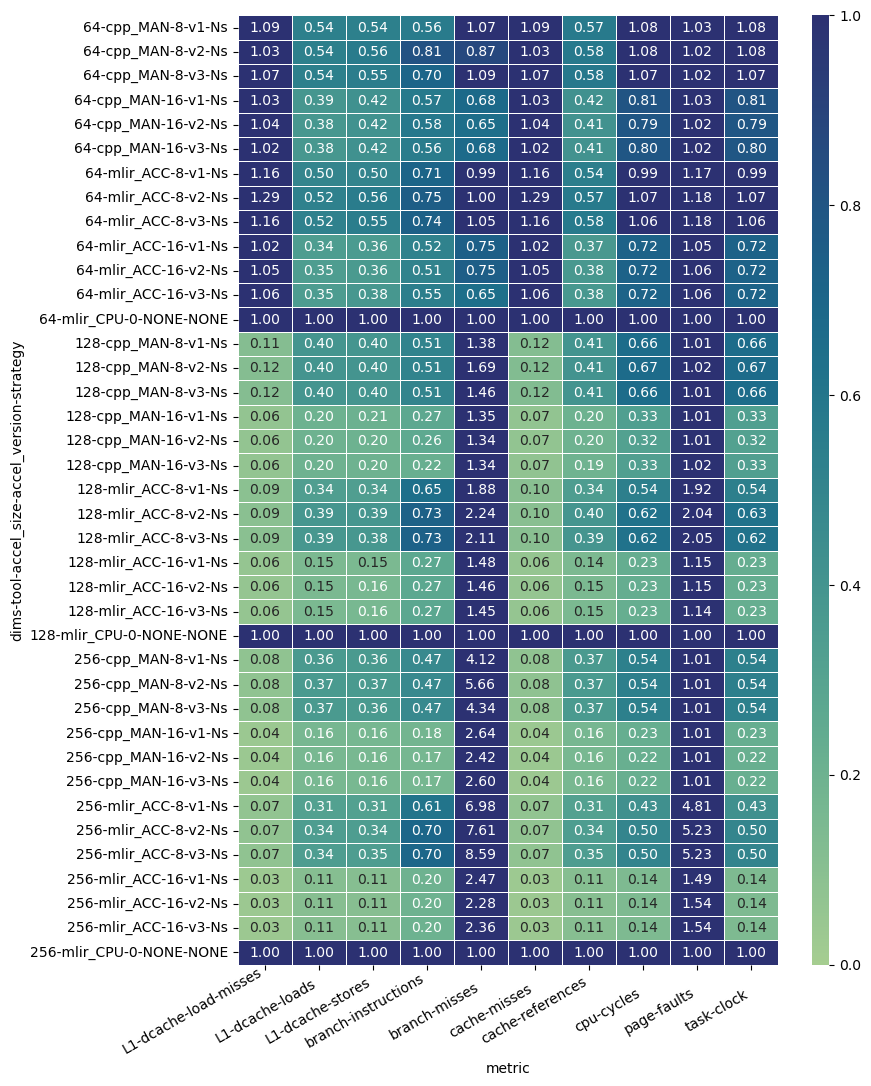

In [155]:
# use seaborn to plot the heatmap of the normalized values presented in columns c
yv = 1250
xv = 6
ys, xs = df_dropped.shape
# fix legend
legend_cfg = {}
# legend_cfg["shrink"] = 0.2 # default is 0.2
legend_cfg["aspect"] = 175*ys/yv  # default is 20
# legend_cfg["fraction"] = 1 # default is 0.2

df_pivot = df_dropped.pivot(index=keep_c, columns='metric', values='value')
plt.figure(figsize=(8*xs/xv, 35*ys/yv))
ax = sns.heatmap(df_pivot,
                 linewidth=.5, annot=True, fmt='.2f',
                 vmin=0, vmax=1,
                 cmap="crest",
                 cbar_kws=legend_cfg
                 )
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
# rotate xticks
plt.xticks(rotation=30, va='center', ha='right', position=(0, -0.012*yv/ys))
# tight layout
plt.tight_layout()
